# Part II - (Bike Usage Patterns Analysis)
## by (Waleed Alhumizi)

## Investigation Overview


> This Notebook contains analysis about Customers Bike Usage, I'll answer important questions about this dataset, using python visualizations libraries - seaborn and matplotlib.
 


## Dataset Overview and Executive Summary

> The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


### **Through the analysis I'll proof these summary of key findings:**

- Males are the most gender in the dataset.
- The total tumber of tike trips per day was in 28 feb 2019.
- Subscripers are more than customers.
- ages between 24 - 40 is the most active.
- 5 to 8 minutes is the most common trip duration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordgobike_cleaned.csv")

In [3]:
# change the dtypes

# start_time and end_time into datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# change these three columns into cateogrical type
df[['bike_share_for_all_trip', 'member_gender', 'user_type']] = df[['bike_share_for_all_trip', 'member_gender', 'user_type']].astype('category')

# change these three columns to intger type
df[['start_station_id', 'end_station_id', 'member_birth_year']] = df[['start_station_id', 'end_station_id', 'member_birth_year']].astype('int64')

## (Percentage of Genders)

> Bar chart shows the percentage of the most common genders according to the dataset.


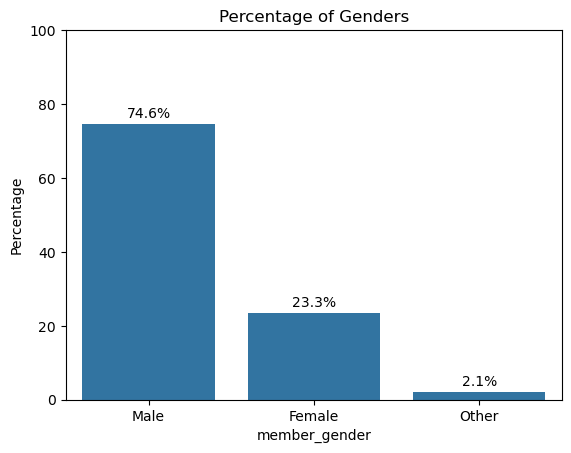

In [4]:
# calculate the percentage of each gender category
perc_of_gend = df["member_gender"].value_counts(normalize=True) * 100

# create a bar plot
pg = sns.barplot(x=perc_of_gend.index, y=perc_of_gend.values, order=["Male", "Female", "Other"], color="tab:blue",)

# set plot title and y-axis label
plt.title("Percentage of Genders")
plt.ylabel("Percentage")
plt.ylim(0, 100)

# add text annotations for each bar indicating the percentage value
for i, v in enumerate(perc_of_gend.values):
    pg.text(i, v + 1, f"{v:.1f}%", ha="center", va="bottom")

# show the plot
plt.show()

### **Observation**

**Males comes with the most percentage 74.6%, then the females 23.3% and the other ages 2.1%.**

## (Duration vs. Member Age by Gender and User Type)

> Facet plot shows informations and relations between four columns as shown down.

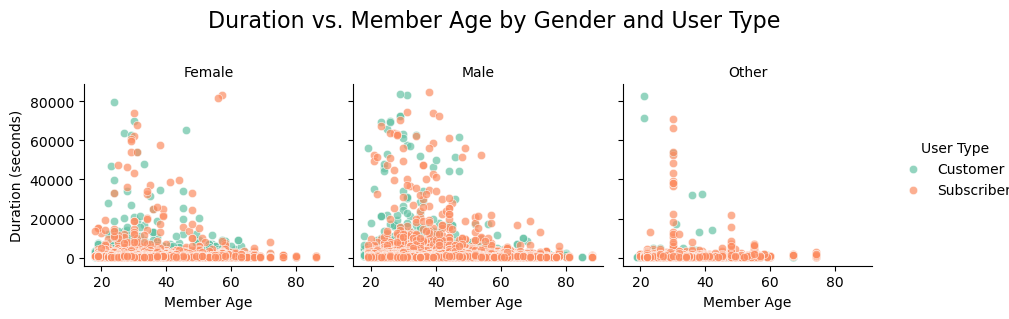

In [5]:
# create a FacetGrid plot
facet = sns.FacetGrid(df, col='member_gender', hue='user_type', palette='Set2')

# map scatter plots to the FacetGrid
facet.map(sns.scatterplot, 'member_age', 'duration_sec', alpha=0.7)

# add legend
facet.add_legend()

# adjust subplot layout
plt.subplots_adjust(top=0.8)

# set super title
plt.suptitle('Duration vs. Member Age by Gender and User Type', fontsize=16, y=1.05)

# set axis labels
facet.set_axis_labels("Member Age", "Duration (seconds)")

# set titles for each subplot
facet.set_titles(col_template="{col_name}")

# set legend title and position
facet._legend.set_title('User Type')
facet._legend.set_bbox_to_anchor([1, 0.5])

# show the plot
plt.show()

### **Observation**


**Between these four variables we can see the duration is the most at 0 - 20,000 (sec), and the susbcripers number is more than customers.**

**The ages between 20 - 40 seems is the most active ages in the bike usage**

## (Total Number of Bike's Usage per Day)

> Line chart shows the time series of february days and it's total bike's usage.

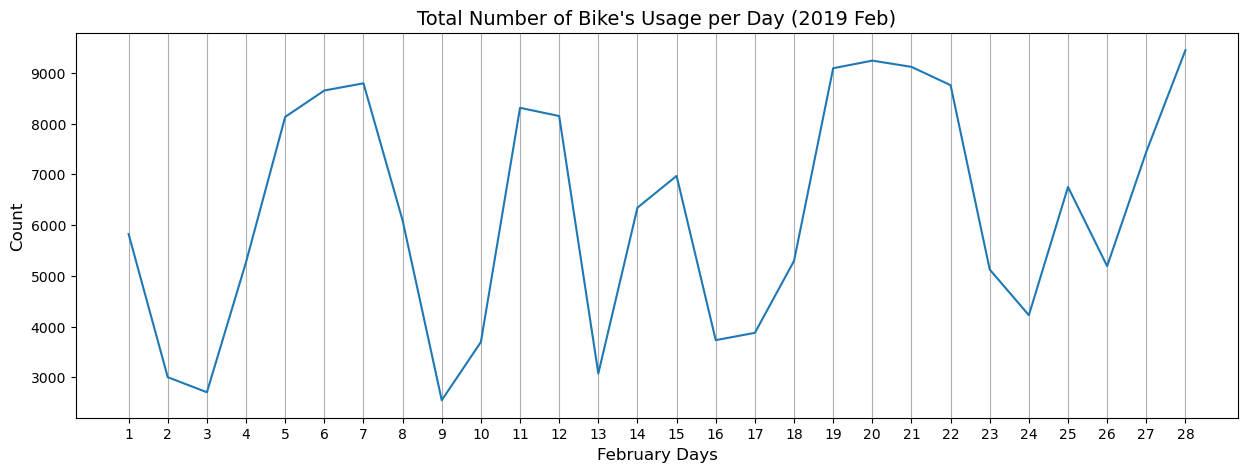

In [6]:
# calculate the total number of bike usages per day in February
week_days = df.start_time.dt.day.value_counts().sort_index()

# create a figure with specified size
plt.figure(figsize=(15, 5))

# plot the data
plt.plot(week_days.index, week_days.values.tolist())

# customize x-axis ticks and labels
ticks = range(1, 29, 1)
labels = [f"{v}" for v in ticks]
plt.xticks(ticks, labels)

# add grid lines along the x-axis
plt.grid(axis="x")

# set y-axis label
plt.ylabel("Count", fontsize=12)

# set x-axis label
plt.xlabel("February Days", fontsize=12)

# set plot title
plt.title("Total Number of Bike's Usage per Day (2019 Feb)", fontsize=14)

# display the plot
plt.show()

### **Observation**

**From 3000 to 9000 seconds the bike's usage was fluctuating in the first three days, the days 5,6,7 records high usage, then it goes fluctuating again untill the day 18 then it goes higher day by day to the day 28.**

# **Conclusion**

**In this notebook, I've explored diverse data analysis and visualization techniques, including plotting distributions, examining relationships between variables, and creating insightful visualizations. By leveraging Python libraries such as Pandas, Matplotlib, and Seaborn, I've gained valuable insights into the dataset, enabling me to uncover patterns and trends. Through effective communication of my findings using clear and impactful visualizations, I have enhanced my understanding of the dataset and its implications. This journey underscores the power of data-driven approaches in informing decision-making and fostering deeper insights.**

In [7]:
# this will save this notebook into html file
!python -m nbconvert --to html Part_II_Explanatory_FordGoBike.ipynb

[NbConvertApp] Converting notebook Part_II_Explanatory_FordGoBike.ipynb to html
[NbConvertApp] Writing 810896 bytes to Part_II_Explanatory_FordGoBike.html
